# Background

After the financial crisis england end up in a recession and got affected by a overwhelming unemployment which led to descending housing prices. The people in the UK had over a decade got easy and big loans to be able to buy a residence which led to that the prices rocketed in the housing market.

The banks did rework their loaning policy and it got much harder to get a loan. This affected the housing market and the prices fell by almost 20%. 

What this research will be looking into is the housing market in London. Is it volatile or not? How is the purchasing power of the inhabitans in the country compared to the housing market. 

# Questions to answer:
* Is the market volatile or not and in what direction? 
* Is there any trend patterns in the market?
* How is the income comparing to the housing prices, can people afford housing?


## Summary of the project is at the bottom of the page.

In [231]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data from https://www.kaggle.com/justinas/housing-in-london

data = pd.read_csv('Housing_London/archive/housing_in_london_monthly_variables.csv')

In [232]:
df = data

In [233]:
#Removing the columns that we dont need for this project.
df = df.drop(['no_of_crimes', 'code', 'borough_flag'], axis=1)
df


,date,area,average_price,houses_sold
0,1995-01-01,city of london,91449,17.0
1,1995-02-01,city of london,82203,7.0
2,1995-03-01,city of london,79121,14.0
3,1995-04-01,city of london,77101,7.0
4,1995-05-01,city of london,84409,10.0
...,...,...,...,...
13544,2019-09-01,england,249942,64605.0
13545,2019-10-01,england,249376,68677.0
13546,2019-11-01,england,248515,67814.0
13547,2019-12-01,england,250410,NaN


In [234]:
# as we can see in the set of data we got the column date in the wrong format, as we want conduct our reasearch for
#the price over the timespan for years so we need split up that column too two new one with one for years and one for months.
# we find the code on https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

#first we convert the object to datetime with pandas function to_datetime
#then we add the new columns years and month and fill them with the data. then we drop the column date because we will
#not need it anymore.
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df = df.drop('date', axis=1)

#in the dataset we found rows with empty values so we removed them by using pandas.index.isn and what that does is that
#it finds all the NaN values in the dataset, which we then put in the variable missing_values and removes it from dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.isna.html
missing_target_rows = df[df['houses_sold'].isna()].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

df

,area,average_price,houses_sold,year,month
0,city of london,91449,17.0,1995,1
1,city of london,82203,7.0,1995,2
2,city of london,79121,14.0,1995,3
3,city of london,77101,7.0,1995,4
4,city of london,84409,10.0,1995,5
...,...,...,...,...,...
13450,england,248562,70681.0,2019,7
13451,england,249432,75079.0,2019,8
13452,england,249942,64605.0,2019,9
13453,england,249376,68677.0,2019,10


We can see that the prices have incremented kinda fast, but around 2007 we could see a big downfall in the housing prices, that is probably due to the financial crisis that happened 2007-2008. Thats an indicator that the prices follow the trend


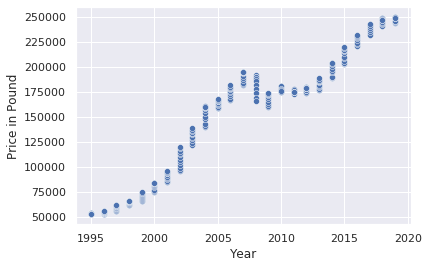

In [235]:
import seaborn as sns
from matplotlib import pyplot as plt
#We are using matplotlib but wants it to look like seaborn
sns.set()

#Selecting only the rows including england and not subparts of england.
df = df.loc[df['area'] == 'england']

#Instansiating new list so we can save the data that we need.
average_price = list()
date = list()
date_new = []
houses_sold = list()



#Iterating the dataframe and extracts data from each row to the lists that we might need later on.
for a in df.values:
    average_price.append(a[1])
    date.append(a[3])
    houses_sold.append(a[2])
    

#Removing duplicates from date list.
for i in date:
    if i not in date_new:
        date_new.append(i)
    

#Sorting all the lists
#average_price.sort()
#houses_sold.sort()
#date.sort()



#plt.scatter(df['year'],average_price, label="average price")

#Plotting a scatterplot with the average_price and year so we can see the cost increase per year.
sns.scatterplot(data=df, y=df['average_price'], x=df['year'])

plt.ylabel("Price in Pound")
plt.xlabel("Year")

print("We can see that the prices have incremented kinda fast, but around 2007 we could see a big downfall in the housing prices, that is probably due to the financial crisis that happened 2007-2008. Thats an indicator that the prices follow the trend")



# Basic analysis of the data

In [236]:
df.describe()

,average_price,houses_sold,year,month
count,299.000000,299.000000,299.000000,299.000000
mean,152427.949833,77182.732441,2006.959866,6.481605
std,62077.236769,21770.894478,7.201677,3.448883
min,52333.000000,25782.000000,1995.000000,1.000000
25%,86340.500000,60560.500000,2001.000000,3.500000
50%,172818.000000,76702.000000,2007.000000,6.000000
75%,191286.000000,91768.000000,2013.000000,9.000000
max,249942.000000,132163.000000,2019.000000,12.000000


# Linear Regression on the house prices related to year

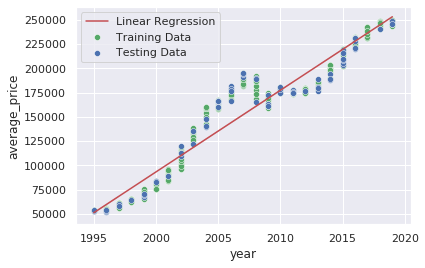

In [237]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#70% Train, 30% Test. We are using the train_test_split function from sklearn which are dividing the dataset into 
#training and test set. 70% train, and 30% test.
X_train, X_test, y_train, y_test = train_test_split(df['year'],df['average_price'])

#Here we are scatterplotting the train and the test data.
sns.scatterplot(X_train, y_train, label='Training Data', color='g')
sns.scatterplot(X_test, y_test, label='Testing Data', color='b')
#Create linear model and train it


#Here we are calling the sklearn function LinearRegression() and loading it into the variable called LR.
LR = LinearRegression()

#Here we are fitting or training our model with the training data from the train_test_split function.
LR.fit(X_train.values.reshape(-1,1), y_train.values)

#Here we are making a prediction on the data with our test data where we are calling the predict function from the LR object.
prediction = LR.predict(X_test.values.reshape(-1,1))

#Plotting out the test data together with the prediction as the linear regression line.
sns.lineplot(X_test, prediction,label='Linear Regression', color='r')






In [238]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, prediction)

print("coefficient of determination:", r2)

coefficient of determination: 0.8912839856775352


### Linear Regression
What the linear regression is helping us to do is to estimate how the y variable in this case the average_price  which is the dependent variable changes as the independent variable x year changes. It helps us estimate the relationship between these two variables. The coefficient of detemination is a measure of how well the regression predicts the data points.

In [239]:
df

,area,average_price,houses_sold,year,month
13156,england,53203,47639.0,1995,1
13157,england,53096,47880.0,1995,2
13158,england,53201,67025.0,1995,3
13159,england,53591,56925.0,1995,4
13160,england,53678,64192.0,1995,5
...,...,...,...,...,...
13450,england,248562,70681.0,2019,7
13451,england,249432,75079.0,2019,8
13452,england,249942,64605.0,2019,9
13453,england,249376,68677.0,2019,10


In [240]:
#Selecting the values in the dataframe that have a numeric value and saving them into corrdata.
#We do this so we can plot them as a heatmap in a correlation matrix.
corrdata = df.iloc[:,1:5]

corrdata

,average_price,houses_sold,year,month
13156,53203,47639.0,1995,1
13157,53096,47880.0,1995,2
13158,53201,67025.0,1995,3
13159,53591,56925.0,1995,4
13160,53678,64192.0,1995,5
...,...,...,...,...
13450,248562,70681.0,2019,7
13451,249432,75079.0,2019,8
13452,249942,64605.0,2019,9
13453,249376,68677.0,2019,10


               average_price  houses_sold      year     month
average_price       1.000000    -0.252085  0.964012  0.040696
houses_sold        -0.252085     1.000000 -0.355530  0.324262
year                0.964012    -0.355530  1.000000 -0.008947
month               0.040696     0.324262 -0.008947  1.000000


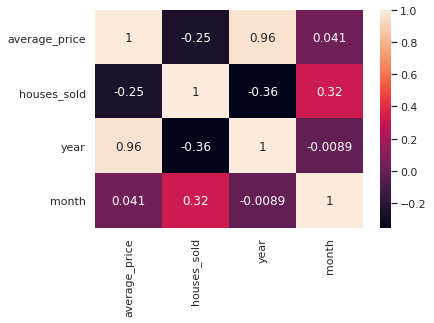

In [241]:
import seaborn as sns
matrix = corrdata.corr()

#Using seaborn to plot the data as a heatmap.
sns.heatmap(matrix, annot=True)
print(matrix)

### Correlation
positive correlation is 1 and below 0 is is negetive correlation,

What we can see is that average price and year have an strong positive correlation.
we can also see that year and houses sold have a negative correlation, so when the years goes up the houses sold will go down acording to this dataset.

0.5267999929864393


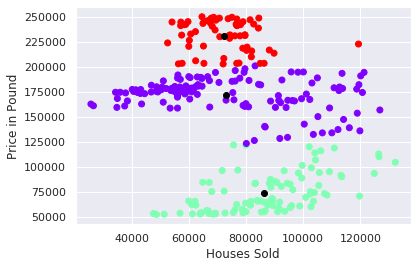

In [242]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt



#Selecting the data from the dataframe that we want to make KMeans clustering on.
data = df.iloc[:, [2,1]].values

#Reworking the data into an numpy array.
data = np.array(data)

#Loading a KMeans function with number of clusters set to 3 into kmeans variable.
kmeans = KMeans(n_clusters=3)
#Computing the KMeans cluster model
kmeans.fit(data)

#Plotting the clusters to plot.
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')

#Plotting centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color ='black')

#Setting x and y label.
plt.ylabel("Price in Pound")
plt.xlabel("Houses Sold")
plt.plot()


#Importing from sklearn.metrics the silhouette_score function. Which is a metric to calculate how good a clustering model/technique is.
from sklearn.metrics import silhouette_score
score = silhouette_score(data, kmeans.labels_)
print(score)




### KMeans cluster
What we can read out from the k means cluster is that the majority of the houses have been bought under 200.000£. The rising pricing on the m
arket can have an impact on what people are able to buy and not. <br>
But what we also can see from the KMeans cluster is that the number of houses sold have decreased very much after the price went over 200000£.<br>
<br>
There is no doubt that the housing market in the UK are on the rise. One interesting topic to research can be to see if the income have grown aswell.

In [243]:
#Data from https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/theeffectsoftaxesandbenefitsonhouseholdincomeprovisionalestimate2019
income_data = pd.read_excel(r'Income_Data/income_data.xls')
income_data

,Year,All individuals,Retired,Non-retired
0,1977,15136,9994,15826
1,1978,16506,10799,17291
2,1979,17283,10608,18261
3,1980,17931,11177,18885
4,1981,17410,11713,18252
5,1982,17006,11325,17840
6,1983,17476,12782,18239
7,1984,17799,12743,18620
8,1985,19019,13239,20023
9,1986,19747,13569,20819


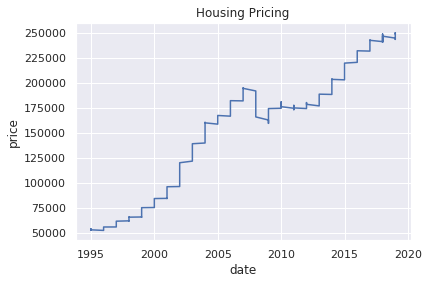

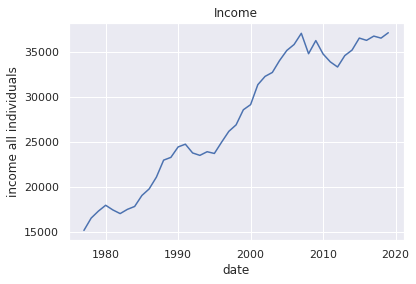

In [244]:
#Plotting the housing pricing graph next to income graph.

plt.plot(df['year'],df['average_price'])
plt.xlabel('date')
plt.ylabel('price')
plt.title('Housing Pricing')

plt.show()

plt.plot(income_data['Year'],income_data['All individuals'])
plt.xlabel('date')
plt.ylabel('income all individuals')
plt.title('Income')

plt.show()

### Plots
What we can read of these two graphs is that both the income and the housing prices are on a steady up trend. A minor setback for the housing around 2007-2008 due to the financial crisis probably and a minor setback in the income around 2012.

In [245]:
# using pandas method loc to set the variable data3 with the data from 2000 to 2019
data3 = df.loc[[13221,13233,13245,13257,13269,13281,13293,13305,13317,13329,13341,13353,13365,13377,13389,13401,13413,13425,13437,13449]]
#using pandas method loc to set the variable income_data2 with the data from 2000 to 2019
income_data2 = income_data.loc[[23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

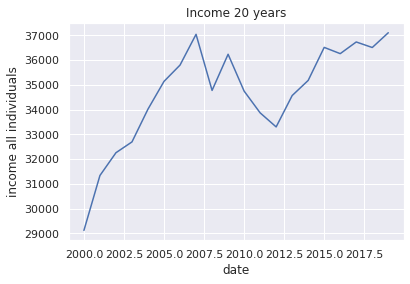

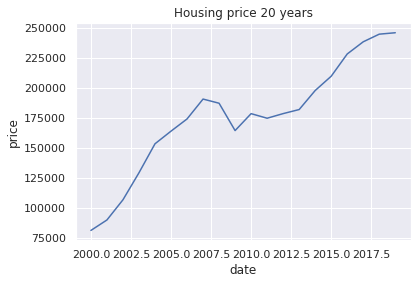

In [246]:
#plotting the income from 2000 to 2019 for all the individuals
plt.plot(income_data2['Year'],income_data2['All individuals'])
plt.xlabel('date')
plt.ylabel('income all individuals')
plt.title('Income 20 years')

plt.show()
#plotting the average price for the housing from 2000 to 2019
plt.plot(data3['year'],data3['average_price'])
plt.xlabel('date')
plt.ylabel('price')
plt.title('Housing price 20 years')

plt.show()

### Plots
These two plots are showing the graphs of the income and housing price 20 years back in time. What we can read from them is that from the year 2000-2006 the income increased very good and at 2006/2007 something happened that made it fall down very much and it took a while for it to recover. The housing market have been on an very good uptrend with just a minor fallback in 2009.

### Useful functions

In [247]:
#Function that counts the percentage increase.
def percentage_increase(initial, final):
    over = final - initial
    under = initial
    percentage = 100*over/under
    return float(percentage)

In [248]:
#Function that counts the cost increase.
def cost_increase(initial, final):
    cost = final - initial
    return float(cost)

In [249]:
def mean(value):
    mean = np.mean(value)
    return mean

### Income increase

In [250]:
#income increase from the year 2000 to the year 2019.   
y2000 = income_data['All individuals'][23]
y2019 = income_data['All individuals'][42]

#Calling on the function percentage_increase and passing in the variables to get the percentage increase.
income_increase_percentage = percentage_increase(y2000,y2019)
print(income_increase_percentage,"% increase since year 2000 to 2019")


#income increase from the year 200 to the year 2019.
income_increase = cost_increase(y2000, y2019)

print(income_increase,"£ increase since year 2000 to 2019")


27.444448260466395 % increase since year 2000 to 2019
7991.0 £ increase since year 2000 to 2019


### Cost housing increase

In [251]:
#Cost increase of housing from the year 200 to the year 2019.
year_of_2000 = df['average_price'][13221]
year_of_2019 = df['average_price'][13454]
print(year_of_2000)

#Calling on the function percentage_increase and passing in the variables to get the percentage increase.
cost_percentage_increase = percentage_increase(year_of_2000,year_of_2019)
print(cost_percentage_increase,"% increase since year 2000 to 2019")


#Cost increase in raw value.
cost = cost_increase(year_of_2000, year_of_2019)
print(cost,"£ increase since 2000")



81269
205.79310684270754 % increase since year 2000 to 2019
167246.0 £ increase since 2000


### Count on the inflation in England

In [252]:
#Data from https://www.statista.com/statistics/270384/inflation-rate-in-the-united-kingdom/
data = [['2000', 0.8],['2001', 1.23],['2002', 1.26],['2003', 1.36],['2004', 1.34],['2005', 2.06],['2006', 2.33],
       ['2007', 2.32],['2008', 3.6],['2009', 2.17],['2010', 3.3],['2011', 4.46],['2012', 2.83],['2013', 2.57],
       ['2014', 1.46],['2015', 0.04],['2016', 0.66], ['2017', 2.68], ['2018', 2.48],['2019', 1.79]]

In [253]:
df = pd.DataFrame(data, columns = ['Year', 'Inflation rate in %'])

In [254]:
df

,Year,Inflation rate in %
0,2000,0.80
1,2001,1.23
2,2002,1.26
3,2003,1.36
4,2004,1.34
5,2005,2.06
6,2006,2.33
7,2007,2.32
8,2008,3.60
9,2009,2.17


In [255]:
#Calculating the mean inflation.
mean(df['Inflation rate in %'])

2.037

In [256]:
#Data from https://www.statista.com/statistics/270384/inflation-rate-in-the-united-kingdom/
#Function that calculates inflation from 2000-2019 bases on inflation rates taken from statista.
#Good to keep in mind.
def inflation(value):
    value = value
    for a in df['Inflation rate in %']:
        percent = a/100 + 1
        value = value * percent
    return value

In [257]:
inf_lation = inflation(100_000)

print("100.000£ in the year 2000 was 2019 worth",inf_lation)
percentage = percentage_increase(100_000, inf_lation)
print("\nThats an percentage increase of",percentage,"%")

100.000£ in the year 2000 was 2019 worth 149521.4516382785

Thats an percentage increase of 49.52145163827849 %


### Bank rate

In [258]:
#data taken from https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp
bank_data = pd.read_csv('bank_rate.csv')

In [259]:
#here we do the same thing as above first we convert the object to datetime with pandas function to_datetime
#then we add the new columns years and month and fill them with the data. then we drop the column date changed because we will
#not need it anymore.
bank_data['Date Changed'] = pd.to_datetime(bank_data['Date Changed'])
bank_data['year'] = bank_data['Date Changed'].apply(lambda x: x.year)
bank_data['month'] = bank_data['Date Changed'].apply(lambda x: x.month)
bank_data = bank_data.drop('Date Changed', axis=1)

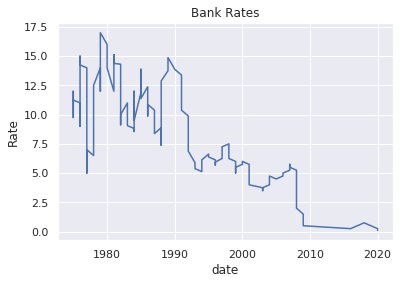

In [260]:
#plotting the bank rate from 1970 to 2019
plt.plot(bank_data['year'],bank_data['Rate'])
plt.xlabel('date')
plt.ylabel('Rate')
plt.title('Bank Rates')

plt.show()

### Plot of the bank rate from 1970 to 2020
What we can read out of this plot is that from 1970 to 1990 the bank rate was going up and down from 7.5% to 15%
from 1991 it sank from 13% too around 5% and around 2009 its sank to 1% and below.


In [261]:
bank_data2 = bank_data.loc[[1,2,3,4,5,8,13,18,19,21,25,27,34]]
bank_data2

,Rate,year,month
1,0.25,2020,3
2,0.75,2018,8
3,0.50,2017,11
4,0.25,2016,8
5,0.50,2009,3
8,2.00,2008,12
13,5.50,2007,12
18,4.75,2006,8
19,4.50,2005,8
21,4.50,2004,6


Text(0.5, 1.0, 'Bank Rate 20 years')

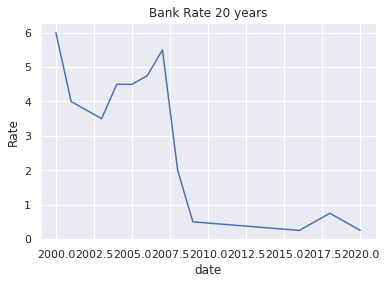

In [262]:
#plotting the bank rate from 2000 to 2020
plt.plot(bank_data2['year'],bank_data2['Rate'])
plt.xlabel('date')
plt.ylabel('Rate')
plt.title('Bank Rate 20 years')

### Plot of the bank rate from 2000 to 2020
In this plot we can see the bank rate in a timespan from 2000 to 2020, what we can read from this is that something happened year 2008 that made the bank rate drop from 5.5% to under 1%. From 2009 the bankrate have been steady under 1%.

# Summary

## Is the market volatile or not?

What we can see from the data that we have analysed is that the market is not so volatile but it is definitely going in an upgoing trend. From the year 2000 we have seen an increase of residence prices of staggering +205% increase and a raw price increase of 167246£. <br><br>We can see an clearly correlation between year and price, with a correlation coefficent of 0.96 which can be translated to the strength of the relationship between the movements of the variables. <br> <br> What we also can read from our KMeans-cluster is that the majority of all the houses have been bought under 200,000£ and the quantity of the houses bought was much higher before than there is today. Does that point towards that people cant afford houses in the same extent as earlier when the prices were lower. Let's check it out!






## How is the income comparing to the housing prices, can people afford housing?

From the year 2000-2019 we have seen an increase of residence prices of staggering +205% increase and a raw price increase of 167246£. <br> In the same time the income has increased +27.4% or 7991£. <br>
<br>

Residence(2000-2019): +205%, 167246£. <br>
Income(2000-2019): +27.4%, 7991£.

What we can see from our analysis is that both housing prices and income are in an up going trend. The residence prices are going up way faster than the incomes are increasing and that can be an early indicator that people wont be able to buy houses in the future if this trend keeps going.<br>

We could analyse earlier that the majority of the houses were bought under 200,000£. Since the price and year have a strong relation to each other, and that we can read from the KMeans cluster that the quantity of houses bought have descended a lot. These two factors can be an early indicator that the purchasing power of the people are decreasing because residences are getting to expensive.


What we also can see from our inflation function that we created based on data taken from statista over the inflation-rate in england is that the inflation rate have been +49.52% with an average of +2.037% per year since the year 2000. It can be translated to 100.000£ at 2000 is today worth 149521£. <br>

Even with the inflation in mind there is such a big difference between the increase of housing prices and the income that people maybe wont be able to afford housing in the future.

What we also can see is that the bank rates are getting lower and lower so people can be mortgaged for a long time with a very low interest rate. Some people are bound a interest rate but for them who are not, what happens when the rate increases?


## Is there any trend patterns in the market?

The trend patterns that we have found our analysis is that year and price have a very strong relation to eachother. <br>

The second trend we found is that both income and housing prices are in an upgoing trend looking back 20 years in time.